# **Install pyspark**

In [ ]:
# install pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 51 kB/s 
     |████████████████████████████████| 199 kB 36.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=6939a076effe4838bf41386851d88490cc66330b336f092a9948680e9bbb5766
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


# **Creating a spark session**

In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

# **Import data sets**

***I have converted the dataset to tab delimited TEXT format***

In [ ]:
# Import files from local drive
from google.colab import files
uploaded = files.upload()

Saving Daily_Target.txt to Daily_Target.txt
Saving GS_Sales_Data.txt to GS_Sales_Data.txt


# **Assign data sets to dataframes**

In [ ]:
# create sales dataframe
salesdf=spark.read.options(delimiter="\t").options(header=True).csv("GS_Sales_Data.txt")
targetdf=spark.read.options(delimiter="\t").options(header=True).csv("Daily_Target.txt")

In [ ]:
# display sales dataframe
salesdf.show(n=10)
targetdf.show(n=10)

+------+--------------+----------+----------+---------+---------+--------------+-----------+-------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+
|Row ID|      Order ID|Order Date|Order_Week|Ship Date|Ship_Week|     Ship Mode|Customer ID|Customer Name|    Segment|Country/Region|        City|State/Province|Postal Code| Region| Regional Manager|     Product ID|       Category|Sub-Category|        Product Name|  Sales|Quantity|Discount|  Profit|Returned|
+------+--------------+----------+----------+---------+---------+--------------+-----------+-------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+
|     1|US-2019-103800|  1/3/2019|    2019-1| 1/7/2019|   2019-2|Stand

# **Defining the schema**

In [ ]:
#create schema for sales dataframe
from pyspark.sql.types import *

sales_schema = StructType([
    StructField("RowID", IntegerType(), False),
    StructField("OrderID", StringType(), False),
    StructField("OrderDate", StringType(), False, metadata={"desc": "Date of order placed"}),
    StructField("OrderWeek", StringType(), True, metadata={"desc": "Week of that order belongs"}),
    StructField("ShipDate", StringType(), False, metadata={"desc": "Date of order shipped"}),
    StructField("ShipWeek", StringType(), True, metadata={"desc": "Week of that shipment belongs"}),
    StructField("ShipMode", StringType(), True, metadata={"desc": "Mode of shipment"}),
    StructField("CustomerID", StringType(), False),
    StructField("CustomerName", StringType(), True),
    StructField("Segment", StringType(), True, metadata={"desc": "Type of the customer"}),
    StructField("Country", StringType(), True),
    StructField("City", StringType(), False),
    StructField("State", StringType(), True),
    StructField("PostalCode", StringType(), True),
    StructField("Region", StringType(), True),
    StructField("RegionalManager", StringType(), True, metadata={"desc": "Regional manager's name"}),
    StructField("ProductID", StringType(), False),
    StructField("Category", StringType(), True),
    StructField("SubCategory", StringType(), True),
    StructField("ProductName", StringType(), True),
    StructField("Sales", FloatType(), False),
    StructField("Quantity", IntegerType(), False),
    StructField("Discount", FloatType(), False),
    StructField("Profit", FloatType(), False),
    StructField("Returned", StringType(), True)
])

In [ ]:
#create schema for sales dataframe
target_schema = StructType([
    StructField("Category", StringType(), True),
    StructField("OrderDate", StringType(), True),
    StructField("Segment", StringType(), True),
    StructField("SalesTarget", FloatType(), True, metadata={"desc": "Target sales to be completed"})
])

# **Assigning schemas for dataframes**

In [ ]:
# assign schema for sales dataframe
salesdf=spark.read.schema(sales_schema).options(delimiter="\t").options(header=True).csv("GS_Sales_Data.txt")
salesdf.show(n=10)

+-----+--------------+---------+---------+---------+--------+--------------+----------+-------------+-----------+-------------+------------+------------+----------+-------+-----------------+---------------+---------------+-----------+--------------------+-------+--------+--------+--------+--------+
|RowID|       OrderID|OrderDate|OrderWeek| ShipDate|ShipWeek|      ShipMode|CustomerID| CustomerName|    Segment|      Country|        City|       State|PostalCode| Region|  RegionalManager|      ProductID|       Category|SubCategory|         ProductName|  Sales|Quantity|Discount|  Profit|Returned|
+-----+--------------+---------+---------+---------+--------+--------------+----------+-------------+-----------+-------------+------------+------------+----------+-------+-----------------+---------------+---------------+-----------+--------------------+-------+--------+--------+--------+--------+
|    1|US-2019-103800| 1/3/2019|   2019-1| 1/7/2019|  2019-2|Standard Class|  DP-13000|Darren Powers

In [ ]:
# assign schema for target dataframe
targetdf=spark.read.schema(target_schema).options(delimiter="\t").options(header=True).csv("Daily_Target.txt")
targetdf.show(n=10)

+---------------+---------+-----------+-----------+
|       Category|OrderDate|    Segment|SalesTarget|
+---------------+---------+-----------+-----------+
|Office Supplies| 1/3/2019|   Consumer|       15.0|
|Office Supplies| 1/4/2019|Home Office|      300.0|
|Office Supplies| 1/5/2019|   Consumer|       21.0|
|      Furniture| 1/6/2019|Home Office|     2316.0|
|Office Supplies| 1/6/2019|   Consumer|       17.0|
|Office Supplies| 1/6/2019|  Corporate|       14.0|
|Office Supplies| 1/6/2019|Home Office|      699.0|
|     Technology| 1/6/2019|Home Office|     1068.0|
|      Furniture| 1/7/2019|   Consumer|       81.0|
|Office Supplies| 1/7/2019|   Consumer|       11.0|
+---------------+---------+-----------+-----------+
only showing top 10 rows



# **NULL value handling**

In [ ]:
# convert #N/A to empty values
salesdf = salesdf.na.replace("#N/A", "")
salesdf.show(n=10)

+-----+--------------+---------+---------+---------+--------+--------------+----------+-------------+-----------+-------------+------------+------------+----------+-------+-----------------+---------------+---------------+-----------+--------------------+-------+--------+--------+--------+--------+
|RowID|       OrderID|OrderDate|OrderWeek| ShipDate|ShipWeek|      ShipMode|CustomerID| CustomerName|    Segment|      Country|        City|       State|PostalCode| Region|  RegionalManager|      ProductID|       Category|SubCategory|         ProductName|  Sales|Quantity|Discount|  Profit|Returned|
+-----+--------------+---------+---------+---------+--------+--------------+----------+-------------+-----------+-------------+------------+------------+----------+-------+-----------------+---------------+---------------+-----------+--------------------+-------+--------+--------+--------+--------+
|    1|US-2019-103800| 1/3/2019|   2019-1| 1/7/2019|  2019-2|Standard Class|  DP-13000|Darren Powers

In [ ]:
#Replace empty string with None for all columns
from pyspark.sql.functions import col,when
salesdf = salesdf.select([when(col(c)=="",None).otherwise(col(c)).alias(c) for c in salesdf.columns])
salesdf.show(n=10)

+-----+--------------+---------+---------+---------+--------+--------------+----------+-------------+-----------+-------------+------------+------------+----------+-------+-----------------+---------------+---------------+-----------+--------------------+-------+--------+--------+--------+--------+
|RowID|       OrderID|OrderDate|OrderWeek| ShipDate|ShipWeek|      ShipMode|CustomerID| CustomerName|    Segment|      Country|        City|       State|PostalCode| Region|  RegionalManager|      ProductID|       Category|SubCategory|         ProductName|  Sales|Quantity|Discount|  Profit|Returned|
+-----+--------------+---------+---------+---------+--------+--------------+----------+-------------+-----------+-------------+------------+------------+----------+-------+-----------------+---------------+---------------+-----------+--------------------+-------+--------+--------+--------+--------+
|    1|US-2019-103800| 1/3/2019|   2019-1| 1/7/2019|  2019-2|Standard Class|  DP-13000|Darren Powers

In [ ]:
# setting a default value to null columns
salesdf = salesdf.na.fill({
    "OrderWeek": "EMPTY",
    "ShipWeek": "EMPTY",
    "ShipMode": "EMPTY",
    "Segment": "EMPTY",
    "Country": "EMPTY",
    "PostalCode": "EMPTY",
    "Region": "EMPTY",
    "RegionalManager": "EMPTY",
    "Category": "EMPTY",
    "SubCategory": "EMPTY",
    "ProductName": "EMPTY",
    "Returned": "No"
})

salesdf.show(n=10)

+-----+--------------+---------+---------+---------+--------+--------------+----------+-------------+-----------+-------------+------------+------------+----------+-------+-----------------+---------------+---------------+-----------+--------------------+-------+--------+--------+--------+--------+
|RowID|       OrderID|OrderDate|OrderWeek| ShipDate|ShipWeek|      ShipMode|CustomerID| CustomerName|    Segment|      Country|        City|       State|PostalCode| Region|  RegionalManager|      ProductID|       Category|SubCategory|         ProductName|  Sales|Quantity|Discount|  Profit|Returned|
+-----+--------------+---------+---------+---------+--------+--------------+----------+-------------+-----------+-------------+------------+------------+----------+-------+-----------------+---------------+---------------+-----------+--------------------+-------+--------+--------+--------+--------+
|    1|US-2019-103800| 1/3/2019|   2019-1| 1/7/2019|  2019-2|Standard Class|  DP-13000|Darren Powers

# **Creating facts & dimension tables**

## **DimProduct dimension**

In [ ]:
# Create DimProduct dimension
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql import functions
from datetime import datetime

DimProduct = salesdf.select('ProductID','Category','SubCategory','ProductName').distinct()
DimProduct = DimProduct.withColumn("ProductSK", monotonically_increasing_id()+1)
DimProduct = DimProduct.withColumn("StartDate", functions.lit(datetime.now().strftime("%Y-%m-%d")))
DimProduct = DimProduct.withColumn("EndDate", functions.lit(None).cast(DateType()))

DimProduct.show(n=20)

+---------------+---------------+-----------+--------------------+---------+----------+-------+
|      ProductID|       Category|SubCategory|         ProductName|ProductSK| StartDate|EndDate|
+---------------+---------------+-----------+--------------------+---------+----------+-------+
|TEC-PH-10001552|     Technology|     Phones|I Need's 3d Hello...|        1|2022-09-13|   null|
|OFF-AR-10001953|Office Supplies|        Art|Boston 1645 Delux...|        2|2022-09-13|   null|
|TEC-AC-10001767|     Technology|Accessories|SanDisk Ultra 64 ...|        3|2022-09-13|   null|
|OFF-PA-10001937|Office Supplies|      Paper|            Xerox 21|        4|2022-09-13|   null|
|OFF-PA-10003039|Office Supplies|      Paper|          Xerox 1960|        5|2022-09-13|   null|
|OFF-EN-10000483|Office Supplies|  Envelopes|White Envelopes, ...|        6|2022-09-13|   null|
|FUR-BO-10004360|      Furniture|  Bookcases|Rush Hierlooms Co...|        7|2022-09-13|   null|
|OFF-LA-10003388|Office Supplies|     La

## **DimOrder dimension**

In [ ]:
# Create DimOrder dimension
DimOrder = salesdf.select('OrderID','OrderDate','OrderWeek','ShipDate', 'ShipWeek', 'ShipMode').distinct()
DimOrder = DimOrder.withColumn("OrderSK", monotonically_increasing_id()+1)
DimOrder = DimOrder.withColumn("StartDate", functions.lit(datetime.now().strftime("%Y-%m-%d")))
DimOrder = DimOrder.withColumn("EndDate", functions.lit(None).cast(DateType()))
DimOrder.show(n=20)

+--------------+----------+---------+----------+--------+--------------+-------+----------+-------+
|       OrderID| OrderDate|OrderWeek|  ShipDate|ShipWeek|      ShipMode|OrderSK| StartDate|EndDate|
+--------------+----------+---------+----------+--------+--------------+-------+----------+-------+
|US-2020-169677| 1/13/2020|   2020-3| 1/15/2020|  2020-3|  Second Class|      1|2022-09-13|   null|
|US-2020-137974| 4/16/2020|  2020-16| 4/18/2020| 2020-16|   First Class|      2|2022-09-13|   null|
|US-2020-122910| 5/12/2020|  2020-20| 5/16/2020| 2020-20|Standard Class|      3|2022-09-13|   null|
|US-2020-159779| 9/25/2020|  2020-39| 9/29/2020| 2020-40|Standard Class|      4|2022-09-13|   null|
|US-2020-115693|12/10/2020|  2020-50|12/15/2020| 2020-51|Standard Class|      5|2022-09-13|   null|
|US-2021-139486| 5/21/2021|  2021-21| 5/23/2021| 2021-22|   First Class|      6|2022-09-13|   null|
|US-2021-107328|  8/8/2021|  2021-33| 8/15/2021| 2021-34|Standard Class|      7|2022-09-13|   null|


## **DimCustomer dimension**

In [ ]:
# Supplement the schema with useful categorical data
from pyspark.sql import functions

DimCustomer = salesdf.groupBy(salesdf['CustomerID']).agg(functions.first(salesdf['CustomerName']), functions.first(salesdf['State']))
df = salesdf.select('CustomerID','Segment','Country', 'City', 'PostalCode', 'Region', 'RegionalManager').distinct()
DimCustomer = DimCustomer.join(df, 'CustomerID')
DimCustomer = DimCustomer.withColumn("CustomerSK", monotonically_increasing_id()+1)
DimCustomer = DimCustomer.withColumn("StartDate", functions.lit(datetime.now().strftime("%Y-%m-%d")))
DimCustomer = DimCustomer.withColumn("EndDate", functions.lit(None).cast(DateType()))
DimCustomer.show(n=20)

+----------+-------------------+--------------+-----------+-------------+------------+----------+-------+-----------------+----------+----------+-------+
|CustomerID|first(CustomerName)|  first(State)|    Segment|      Country|        City|PostalCode| Region|  RegionalManager|CustomerSK| StartDate|EndDate|
+----------+-------------------+--------------+-----------+-------------+------------+----------+-------+-----------------+----------+----------+-------+
|  CK-12325| Christine Kargatis|      Virginia|Home Office|United States|  Chesapeake|     23320|  South|      Fred Suzuki|         1|2022-09-13|   null|
|  MP-17965|      Michael Paige|        Quebec|  Corporate|       Canada|    Montreal|       H1A|   East|      Chuck Magee|         2|2022-09-13|   null|
|  MG-17680|  Maureen Gastineau|          Ohio|Home Office|United States|      Newark|     43055|   East|      Chuck Magee|         3|2022-09-13|   null|
|  LH-17020|        Lisa Hazard|         Texas|   Consumer|United States|   

## **FactSales fact table**

In [ ]:
# Create FactSales fact table
FactSales = salesdf.select('OrderID', 'CustomerID', 'ProductID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Returned')
FactDimOrder = DimOrder.select('OrderID', 'OrderSK')
FactDimCustomer = DimCustomer.select('CustomerID', 'CustomerSK')
FactDimProduct = DimProduct.select('ProductID', 'ProductSK')
FactSales = FactSales.join(FactDimOrder, FactSales.OrderID==FactDimOrder.OrderID, "inner").join(FactDimCustomer, FactSales.CustomerID==FactDimCustomer.CustomerID, "inner").join(FactDimProduct, FactSales.ProductID==FactDimProduct.ProductID, "inner").drop('CustomerID', 'ProductID', 'OrderID')
FactSales = FactSales.withColumn("StartDate", functions.lit(datetime.now().strftime("%Y-%m-%d")))
FactSales = FactSales.withColumn("EndDate", functions.lit(None).cast(DateType()))
FactSales = FactSales.withColumn("ModifiedDate", functions.lit(None).cast(DateType()))
FactSales.show(n=20)

+-------+--------+--------+---------+--------+-------+----------+---------+----------+-------+------------+
|  Sales|Quantity|Discount|   Profit|Returned|OrderSK|CustomerSK|ProductSK| StartDate|EndDate|ModifiedDate|
+-------+--------+--------+---------+--------+-------+----------+---------+----------+-------+------------+
|1212.96|       8|     0.3|  -69.312|      No|   4670|         1|       16|2022-09-13|   null|        null|
|1247.64|       3|     0.0| 349.3392|      No|   4203|         1|     1212|2022-09-13|   null|        null|
| 452.45|       5|     0.5| -244.323|     Yes|   2859|         1|     1092|2022-09-13|   null|        null|
|  23.68|       2|     0.2|     8.88|     Yes|   2859|         1|      670|2022-09-13|   null|        null|
| 89.584|       2|     0.2|   4.4792|     Yes|   2859|         1|     1198|2022-09-13|   null|        null|
| 1188.0|       9|     0.7|   -950.4|     Yes|   2859|         1|     1458|2022-09-13|   null|        null|
| 62.982|       3|     0.4| 

# **Dealing with calendar dimension**

In [ ]:
# Create calendar dimension
from pyspark.sql.functions import explode, sequence, to_date

beginDate = '2000-01-01'
endDate = '2050-12-31'

(
  spark.sql(f"select explode(sequence(to_date('{beginDate}'), to_date('{endDate}'), interval 1 day)) as calendarDate")
    .createOrReplaceTempView('dates')
)

In [ ]:
query = """select
  year(calendarDate) * 10000 + month(calendarDate) * 100 + day(calendarDate) as DateInt,
  CalendarDate,
  year(calendarDate) AS CalendarYear,
  date_format(calendarDate, 'MMMM') as CalendarMonth,
  month(calendarDate) as MonthOfYear,
  date_format(calendarDate, 'EEEE') as CalendarDay,
  dayofweek(calendarDate) AS DayOfWeek,
  weekday(calendarDate) + 1 as DayOfWeekStartMonday,
  case
    when weekday(calendarDate) < 5 then 'Y'
    else 'N'
  end as IsWeekDay,
  dayofmonth(calendarDate) as DayOfMonth,
  case
    when calendarDate = last_day(calendarDate) then 'Y'
    else 'N'
  end as IsLastDayOfMonth,
  dayofyear(calendarDate) as DayOfYear,
  weekofyear(calendarDate) as WeekOfYearIso,
  quarter(calendarDate) as QuarterOfYear,
  /* Use fiscal periods needed by organization fiscal calendar */
  case
    when month(calendarDate) >= 10 then year(calendarDate) + 1
    else year(calendarDate)
  end as FiscalYearOctToSep,
  (month(calendarDate) + 2) % 12 + 1 AS FiscalMonthOctToSep,
  case
    when month(calendarDate) >= 7 then year(calendarDate) + 1
    else year(calendarDate)
  end as FiscalYearJulToJun,
  (month(calendarDate) + 5) % 12 + 1 AS FiscalMonthJulToJun
from
  dates
order by
  calendarDate"""

dataframe = spark.sql(query)

# **Sales Performance across Product Surrogate Key**

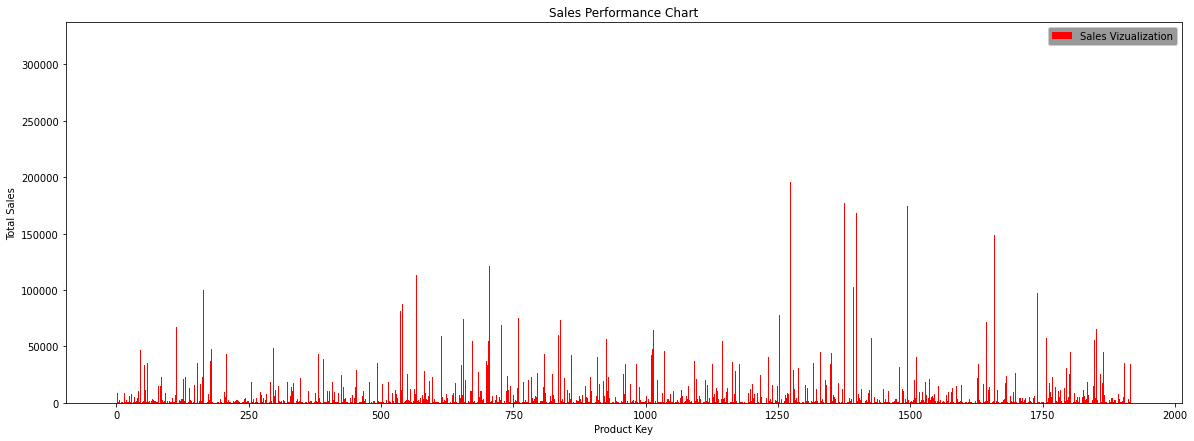

In [ ]:
import matplotlib.pyplot as plt
import pandas

sc=spark.sparkContext
productplot = FactSales.groupBy('ProductSK').sum('Sales')

x=productplot.toPandas()["ProductSK"].values.tolist()
y=productplot.toPandas()["sum(Sales)"].values.tolist()

plt.bar(x,y, color="red", label="Sales Vizualization")
plt.title("Sales Performance Chart")
plt.xlabel("Product Key")
plt.ylabel("Total Sales")
plt.legend(facecolor="grey")
plt.rcParams["figure.figsize"] = (20,7)
plt.show()

# **Sales Performance across Product Category**

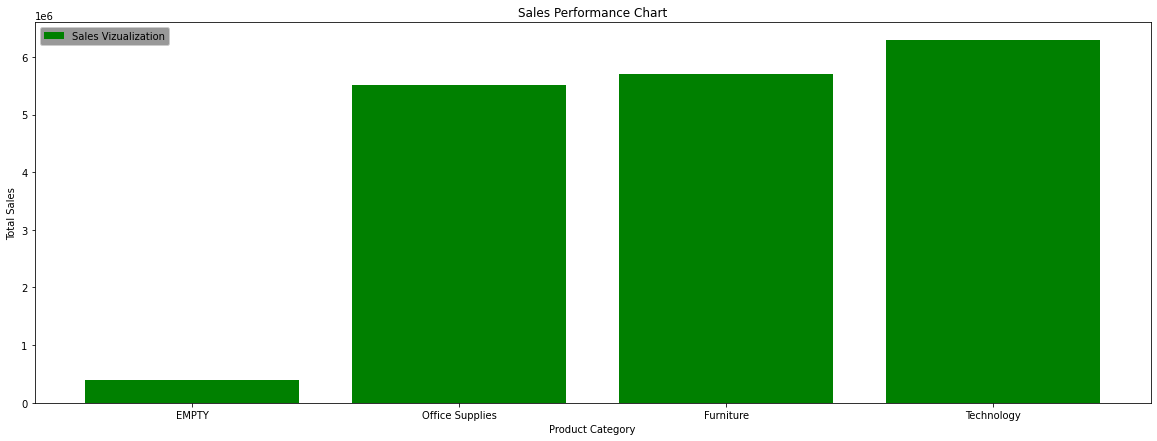

In [ ]:
from pyspark.sql.functions import desc

SalesPerformanceDF2 = FactSales.join(DimProduct, FactSales.ProductSK == DimProduct.ProductSK, 'inner').select(DimProduct.ProductID, DimProduct.Category, FactSales.Sales)
productplot = SalesPerformanceDF2.groupBy('Category').sum('Sales')

x=productplot.toPandas()["Category"].values.tolist()
y=productplot.toPandas()["sum(Sales)"].values.tolist()

plt.bar(x,y, color="green", label="Sales Vizualization")
plt.title("Sales Performance Chart")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.legend(facecolor="grey")
plt.rcParams["figure.figsize"] = (20,17)
plt.show()

# **Sales Performance across Product Sub Category**

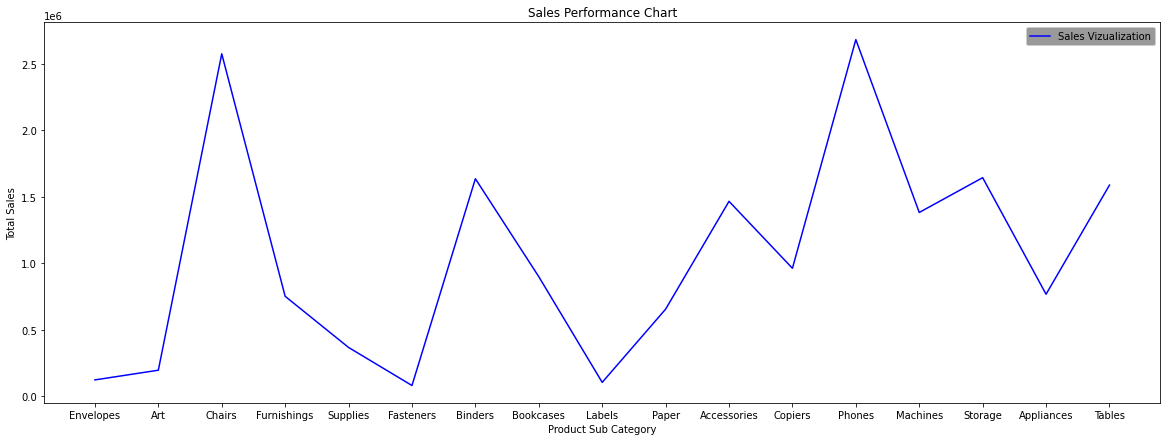

In [ ]:
from pyspark.sql.functions import desc

SalesPerformanceDF = FactSales.join(DimProduct, FactSales.ProductSK == DimProduct.ProductSK, 'inner').select(DimProduct.ProductName, DimProduct.SubCategory, FactSales.Sales)
productplot = SalesPerformanceDF.groupBy('SubCategory').sum('Sales')

x=productplot.toPandas()["SubCategory"].values.tolist()
y=productplot.toPandas()["sum(Sales)"].values.tolist()

plt.plot(x,y, color="blue", label="Sales Vizualization")
plt.title("Sales Performance Chart")
plt.xlabel("Product Sub Category")
plt.ylabel("Total Sales")
plt.legend(facecolor="grey")
plt.rcParams["figure.figsize"] = (20,7)
plt.show()

# **Profitability across Product Category**

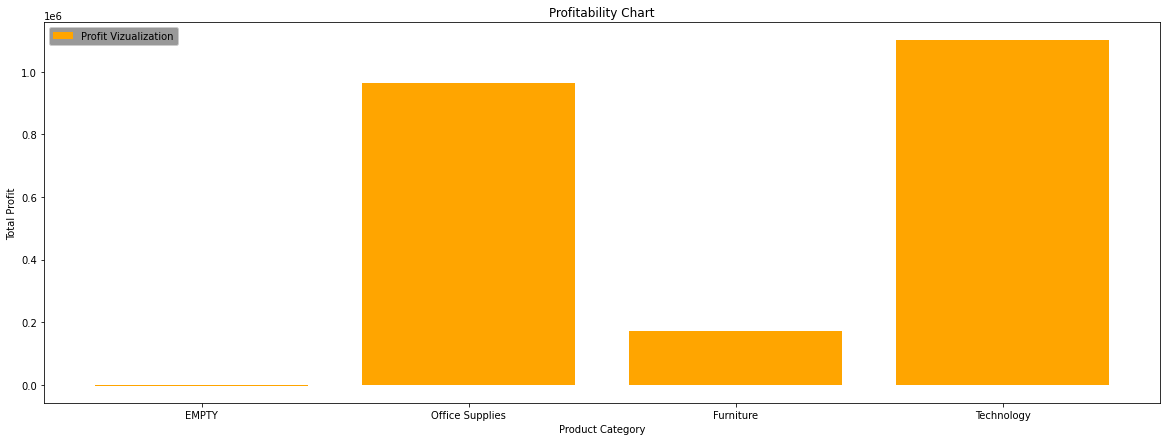

In [ ]:
from pyspark.sql.functions import desc

Profitability = FactSales.join(DimProduct, FactSales.ProductSK == DimProduct.ProductSK, 'inner').select(DimProduct.ProductID, DimProduct.Category, FactSales.Profit)
productplot = Profitability.groupBy('Category').sum('Profit')

x=productplot.toPandas()["Category"].values.tolist()
y=productplot.toPandas()["sum(Profit)"].values.tolist()

plt.bar(x,y, color="orange", label="Profit Vizualization")
plt.title("Profitability Chart")
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.legend(facecolor="grey")
plt.rcParams["figure.figsize"] = (20,7)
plt.show()

# **Profitability across Product Sub Category**

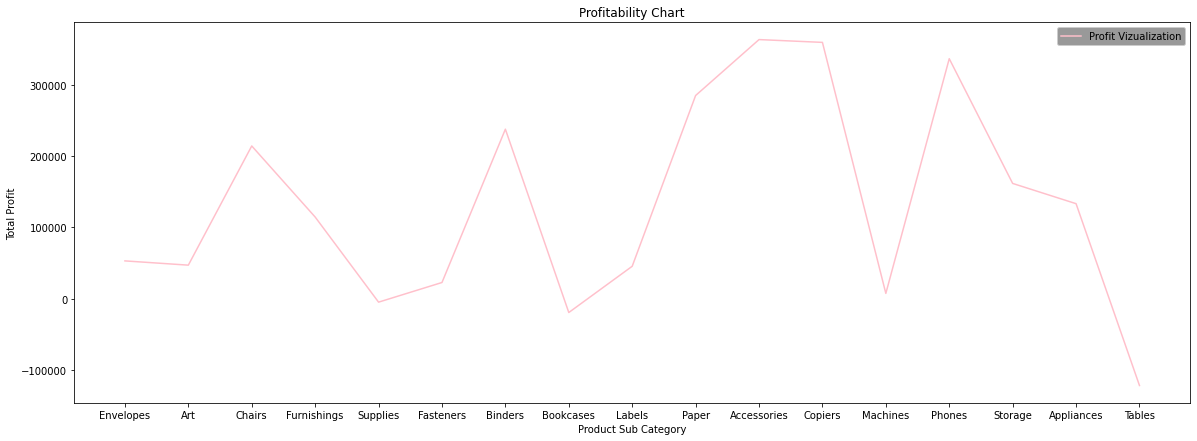

In [ ]:
from pyspark.sql.functions import desc

Profitability = FactSales.join(DimProduct, FactSales.ProductSK == DimProduct.ProductSK, 'inner').select(DimProduct.ProductName, DimProduct.SubCategory, FactSales.Profit)
productplot = Profitability.groupBy('SubCategory').sum('Profit')

x=productplot.toPandas()["SubCategory"].values.tolist()
y=productplot.toPandas()["sum(Profit)"].values.tolist()

plt.plot(x,y, color="pink", label="Profit Vizualization")
plt.title("Profitability Chart")
plt.xlabel("Product Sub Category")
plt.ylabel("Total Profit")
plt.legend(facecolor="grey")
plt.rcParams["figure.figsize"] = (20,17)
plt.show()

# **Sales Performance across Geogophical Hierarchy**

In [ ]:
# importing package
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import plotly.express as px

SalesPerformanceDF = FactSales.join(DimCustomer, FactSales.CustomerSK == DimCustomer.CustomerSK, 'inner').select(DimCustomer.Country, DimCustomer.City, FactSales.Sales)
productplot = SalesPerformanceDF.groupBy('Country','City').sum('Sales')

A=productplot.toPandas()["Country"].values.tolist()
B=productplot.toPandas()["City"].values.tolist()
C=productplot.toPandas()["sum(Sales)"].values.tolist()

df = pd.DataFrame(dict(A=A, B=B, C=C))
df["all"] = "all"
print(df)

fig = px.treemap(df, path=['all', 'A', 'B'], values='C')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

                 A                 B             C  all
0    United States  Huntington Beach  15760.378019  all
1    United States      Carol Stream   2287.076985  all
2    United States        Springdale   2567.656051  all
3    United States      Indianapolis  39726.103734  all
4    United States       Albuquerque  36129.655834  all
..             ...               ...           ...  ...
538  United States           Andover   5087.920078  all
539  United States          Thornton   4445.696966  all
540  United States   Rochester Hills   1080.750987  all
541  United States        Twin Falls   3003.016009  all
542  United States          Gastonia   2846.705002  all

[543 rows x 4 columns]


# **Profitability across Geogophical Hierarchy**

In [ ]:
# importing package
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import plotly.express as px

Profitability = FactSales.join(DimCustomer, FactSales.CustomerSK == DimCustomer.CustomerSK, 'inner').select(DimCustomer.Country, DimCustomer.City, FactSales.Profit)
productplot = Profitability.groupBy('Country','City').sum('Profit')

A=productplot.toPandas()["Country"].values.tolist()
B=productplot.toPandas()["City"].values.tolist()
C=productplot.toPandas()["sum(Profit)"].values.tolist()

df = pd.DataFrame(dict(A=A, B=B, C=C))
df["all"] = "all"
print(df)

fig = px.bar(df, A, C, B, text_auto=True)
fig.show()

                 A                 B            C  all
0    United States  Huntington Beach  2402.074796  all
1    United States      Carol Stream   331.008202  all
2    United States        Springdale   417.591789  all
3    United States      Indianapolis  3981.034064  all
4    United States       Albuquerque  5129.244319  all
..             ...               ...          ...  ...
538  United States           Andover   226.452879  all
539  United States          Thornton    15.503403  all
540  United States   Rochester Hills   -86.873798  all
541  United States        Twin Falls   589.549910  all
542  United States          Gastonia   -52.740585  all

[543 rows x 4 columns]


# **Sales vs Discount**

**Conclusion:** *There is no increment of sales due to increment of discount rate*




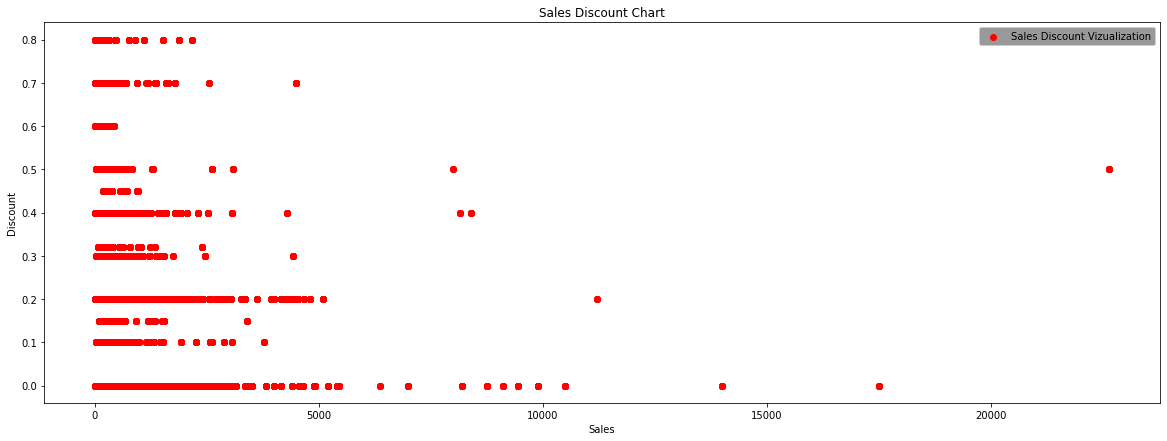

In [ ]:
discount = FactSales.select('Sales', 'Discount').orderBy('Sales')

x=discount.toPandas()["Sales"].values.tolist()
y=discount.toPandas()["Discount"].values.tolist()

plt.scatter(x,y, color="red", label="Sales Discount Vizualization")
plt.title("Sales Discount Chart")
plt.xlabel("Sales")
plt.ylabel("Discount")
plt.legend(facecolor="grey")
plt.rcParams["figure.figsize"] = (20,7)
plt.show()

# **Finding Seasonal Component**

**Conclusion:** *Couldn't find any seasonal component*

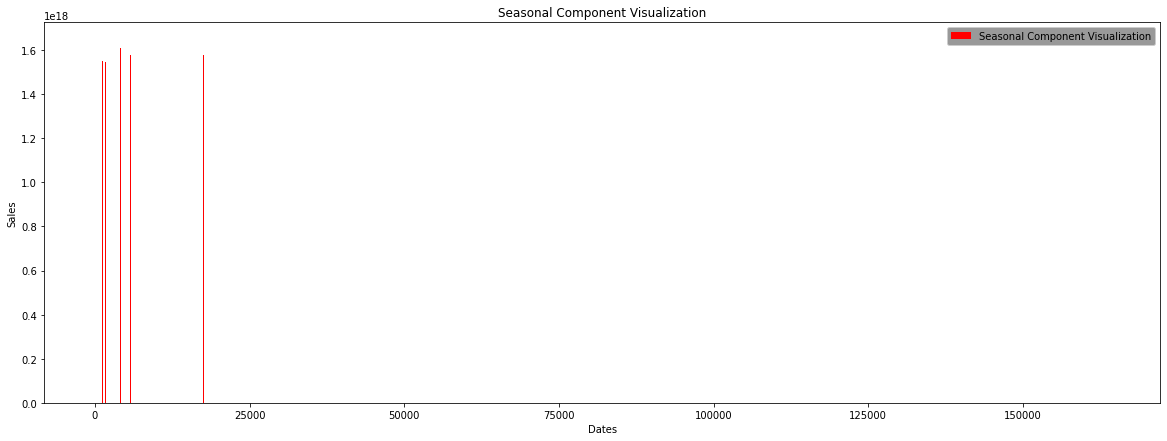

In [ ]:
import pandas as pd
from pyspark.sql.functions import to_timestamp

seasonal = FactSales.join(DimOrder, FactSales.OrderSK == DimOrder.OrderSK, 'inner').select(DimOrder.OrderDate, FactSales.Sales)
seasonaldf = seasonal.toPandas()
seasonaldf['OrderDate'] = pd.to_datetime(seasonaldf['OrderDate'], format='%M/%d/%Y')
seasonal2=spark.createDataFrame(seasonaldf)

# seasonal2.show()

productseason = seasonal2.groupBy('OrderDate').sum('Sales')
y=productseason.toPandas()["sum(Sales)"].values.tolist()
# y=productseason.toPandas()["OrderDate"].values.tolist()
x = productseason.withColumn('OrderDate', to_timestamp(productseason.OrderDate, 'yyyy-MM-dd')).toPandas()["OrderDate"].values.tolist()
seasonal2.select('OrderDate')


plt.bar(y, x, color="red", label="Seasonal Component Visualization")
plt.title("Seasonal Component Visualization")
plt.xlabel("Dates")
plt.ylabel("Sales")
plt.legend(facecolor="grey")
plt.rcParams["figure.figsize"] = (20,7)
plt.show()


# **Create a ML model**

## **Create data frame for ML model**

In [ ]:
# Import libraries
import pandas as pd

df=salesdf.select('Segment', 'ShipWeek', 'Quantity')
groupeddf = df.groupBy('Segment', 'ShipWeek').sum('Quantity')
df = groupeddf.toPandas()

## **Data preparation**

### Convert categorical data to numerical data

In [ ]:
# replacing values
df['Segment'].replace(['Consumer', 'Corporate', 'Home Office'], [0, 1, 2], inplace=True)
df['ShipWeek'] = df['ShipWeek'].str[5:]
df['ShipWeek'] = pd.to_numeric(df['ShipWeek'])
df

,Segment,ShipWeek,sum(Quantity)
0,0,35,128
1,2,36,24
2,2,44,13
3,0,3,33
4,0,7,37
...,...,...,...
618,0,37,203
619,2,52,22
620,1,1,15
621,1,9,7


### Data seperation as X and y

In [ ]:
y = df['sum(Quantity)']
y

0      128
1       24
2       13
3       33
4       37
      ... 
618    203
619     22
620     15
621      7
622     80
Name: sum(Quantity), Length: 623, dtype: int64

In [ ]:
X = df[['Segment', 'ShipWeek']]
X

,Segment,ShipWeek
0,0,35
1,2,36
2,2,44
3,0,3
4,0,7
...,...,...
618,0,37
619,2,52
620,1,1
621,1,9


### Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_train

,Segment,ShipWeek
302,0,4
332,2,6
279,2,14
581,1,2
391,1,25
...,...,...
578,1,6
53,0,27
350,2,29
79,2,50


In [ ]:
X_test

,Segment,ShipWeek
392,1,37
200,1,52
396,2,45
75,1,3
259,2,1
...,...,...
276,0,2
149,0,50
159,2,23
154,1,31


In [ ]:
y_train

302     13
332     19
279     23
581     69
391     32
      ... 
578     45
53     101
350     19
79      80
520     54
Name: sum(Quantity), Length: 498, dtype: int64

In [ ]:
y_test

392     84
200    106
396     91
75       4
259      3
      ... 
276     18
149    220
159     16
154     20
225     52
Name: sum(Quantity), Length: 125, dtype: int64

## **Model building**

### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_train,y_train)

0.4368014419522589

In [ ]:
model.score(X_test,y_test)

0.4683114768669837

### **Applying the model to build a prediction**

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([ 74.63070394,  95.71494942,  54.97940234,  26.83974751,
        -6.86771775,  32.46221297,  45.11276026,  22.65022593,
        62.00748417,  88.68686759,  63.35844549,  36.67906206,
        73.19776005,  80.22584187, 125.20556557,  94.28200553,
        43.70714389,  35.2734457 ,  67.60262211,  56.35769118,
        64.76406185,  90.06515643,  81.63145824,  -6.86771775,
        40.92323868,  52.14084209,  25.46145866,  87.28125123,
        70.38652732,  80.22584187, 115.36625101, 112.55501828,
        61.95282912,  92.90371669,  45.14008778,  73.22508757,
        85.87563486, 105.52693646,  46.51837662,  54.92474729,
        29.65098024,  77.41460914,  57.73598002,  45.11276026,
        47.92399299,  28.27269139, 115.36625101,  54.92474729,
         7.18844591,  33.86782933, 101.31008736,  24.0558423 ,
        78.84755303,  11.40529501,  -1.24525228,  67.60262211,
        60.54721276,  92.87638917,  53.57378598,  36.67906206,
        84.44269097,  60.6018678 ,  33.89515686, 109.74

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
392,84,74.630704
200,106,95.714949
396,91,54.979402
75,4,26.839748
259,3,-6.867718
...,...,...
276,18,56.330364
149,220,123.799949
159,16,24.055842
154,20,66.197006


In [ ]:
model.predict([[1,52]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([95.71494942])

### **Fit model again to the whole data set**

In [ ]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

### **Creating GUI for model prediction**

In [ ]:
#@title Predict Future Quantity
segment = "Home Office" #@param ["Consumer", "Corporate", "Home Office"]
week = 6 #@param {type:"slider", min:1, max:52, step:1}

segment_type = -1
if segment == 'Consumer':
  segment_type = 0
elif segment == 'Corporate':
  segment_type = 1
elif segment == 'Home Office':
  segment_type = 2

model.predict([[segment_type, week]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([20.16701919])

## **Discuss how such a model could be further improved.**

#### You can do several things to increase the accuracy of the model. If you can feed more data to the model it is the best way to improve the accuracy of the model.

#### Treat missing data and outliers properly

#### Feature Engineering

#### Feature Selection